In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

%matplotlib inline

In [2]:
# reading dataset
dataset = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00194/sensor_readings_24.data')

In [3]:
# naming the columns

dataset.columns = ['US1','US2','US3','US4','US5','US6','US7','US8','US9','US10','US11','US12','US13','US14','US15','US16','US17',
                   'US18','US19','US20','US21','US22','US23','US24','CLASS']

In [4]:
# dataset description
dataset.describe()

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US15,US16,US17,US18,US19,US20,US21,US22,US23,US24
count,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,...,5455.000000,5455.000000,5455.000000,5455.00000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000,5455.000000
mean,1.471807,2.327378,2.489139,2.796346,2.958178,2.893068,3.350811,2.540431,3.125767,2.832421,...,2.205857,1.202223,0.989921,0.91035,1.058212,1.076436,1.016030,1.778279,1.555250,1.578719
std,0.802753,1.410058,1.247454,1.309438,1.339062,1.282693,1.413645,1.111653,1.357047,1.307960,...,1.715580,1.098638,0.942138,0.88959,1.144711,1.141570,0.887485,1.571726,1.291478,1.150480
min,0.400000,0.437000,0.470000,0.833000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.35400,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.921000,1.362000,1.538500,1.731000,1.774000,1.785500,1.930500,1.618000,1.799500,1.636000,...,0.860000,0.690500,0.581000,0.53000,0.523500,0.542000,0.567000,0.743000,0.792000,0.884000
50%,1.335000,1.905000,2.064000,2.457000,2.667000,2.682000,3.225000,2.171000,2.802000,2.679000,...,1.328000,0.803000,0.738000,0.68500,0.691000,0.693000,0.764000,1.031000,1.071000,1.289000
75%,1.814000,2.683000,2.739000,4.094000,4.314000,3.835500,5.000000,3.193000,5.000000,3.526500,...,4.436500,1.159000,0.913000,0.83700,0.857000,0.863000,1.002500,2.068500,1.560000,1.657500
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.022000,...,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


In [5]:
# storing dataset values in arrays
X = dataset.iloc[:, :-1].values
Y = dataset.iloc[:, 24].values

In [6]:
# split of training and test data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.15, random_state = 0)

In [7]:
dataset_train = pd.DataFrame(X_train)
dataset_train.columns = ['US1','US2','US3','US4','US5','US6','US7','US8','US9','US10','US11','US12','US13','US14','US15',
                         'US16','US17','US18','US19','US20','US21','US22','US23','US24']
dataset_train['CLASS'] = Y_train

In [8]:
dataset_train.describe()

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US15,US16,US17,US18,US19,US20,US21,US22,US23,US24
count,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,...,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000
mean,1.470017,2.326381,2.498283,2.798682,2.962284,2.900792,3.364229,2.546533,3.129461,2.837426,...,2.191850,1.212897,0.995117,0.919874,1.061862,1.073981,1.017853,1.779891,1.564551,1.581489
std,0.801642,1.403715,1.252298,1.309920,1.339737,1.283546,1.415131,1.111684,1.356676,1.306787,...,1.709719,1.111846,0.954864,0.910916,1.151475,1.136369,0.886194,1.573482,1.299098,1.156391
min,0.400000,0.437000,0.470000,0.848000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.922000,1.363000,1.540000,1.731750,1.772000,1.789000,1.932750,1.626000,1.803000,1.645000,...,0.860000,0.691000,0.580000,0.528750,0.522750,0.540000,0.565750,0.742750,0.793750,0.883750
50%,1.332000,1.905000,2.067500,2.456500,2.666500,2.692000,3.229000,2.177500,2.802000,2.679500,...,1.318500,0.805000,0.738000,0.683000,0.687000,0.691000,0.764500,1.035000,1.073000,1.287000
75%,1.800000,2.670250,2.749000,4.103750,4.318500,3.899000,5.000000,3.195250,5.000000,3.546750,...,4.363500,1.165250,0.913000,0.840000,0.858000,0.862000,1.009000,2.069250,1.568250,1.657000
max,5.000000,5.025000,5.029000,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


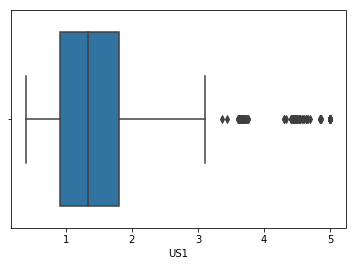

In [9]:
# the following 24 box plots are observed to see which features have outliers

sns.boxplot(x=dataset_train["US1"])

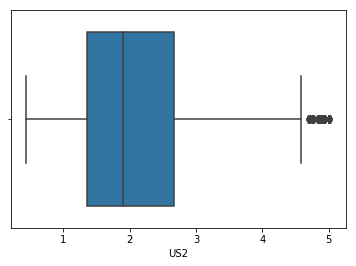

In [10]:
sns.boxplot(x=dataset_train["US2"])

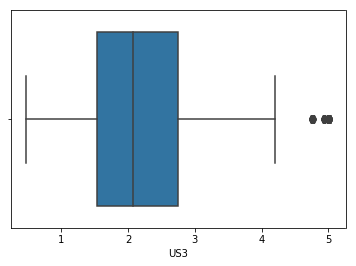

In [11]:
sns.boxplot(x=dataset_train["US3"])

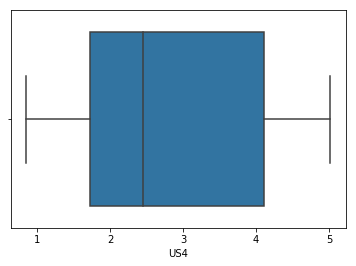

In [12]:
sns.boxplot(x=dataset_train["US4"])

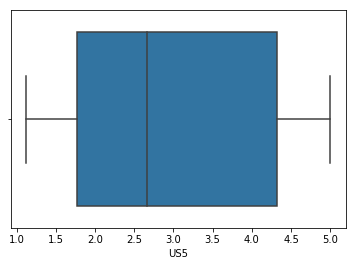

In [13]:
sns.boxplot(x=dataset_train["US5"])

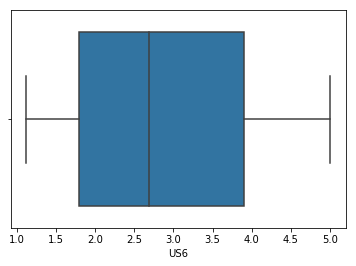

In [14]:
sns.boxplot(x=dataset_train["US6"])

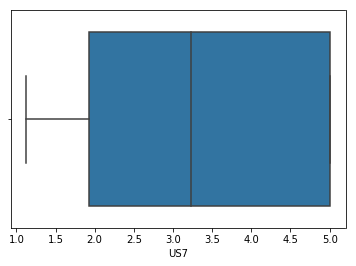

In [15]:
sns.boxplot(x=dataset_train["US7"])

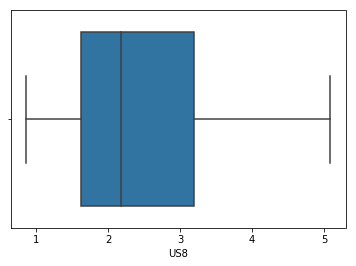

In [16]:
sns.boxplot(x=dataset_train["US8"])

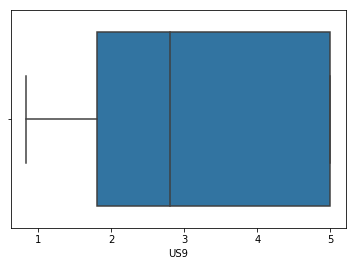

In [17]:
sns.boxplot(x=dataset_train["US9"])

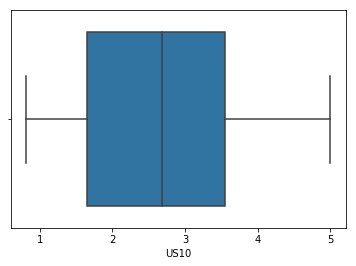

In [18]:
sns.boxplot(x=dataset_train["US10"])

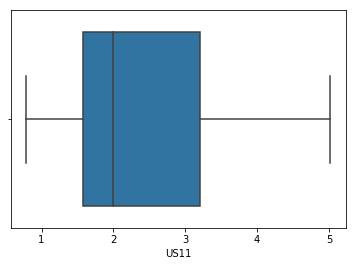

In [19]:
sns.boxplot(x=dataset_train["US11"])

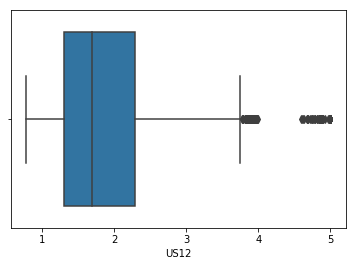

In [20]:
sns.boxplot(x=dataset_train["US12"])

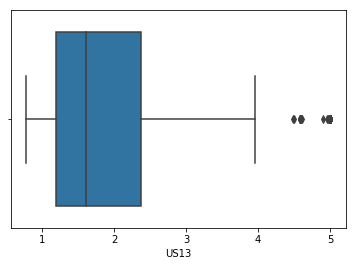

In [21]:
sns.boxplot(x=dataset_train["US13"])

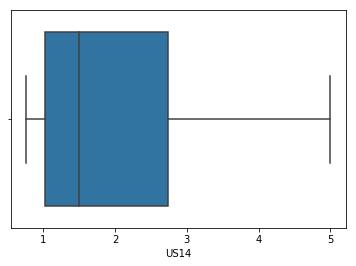

In [22]:
sns.boxplot(x=dataset_train["US14"])

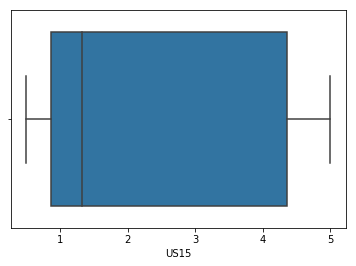

In [23]:
sns.boxplot(x=dataset_train["US15"])

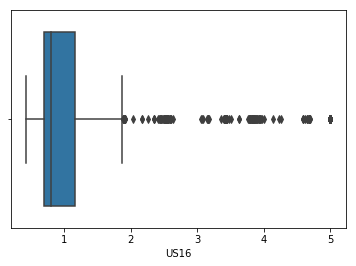

In [24]:
sns.boxplot(x=dataset_train["US16"])

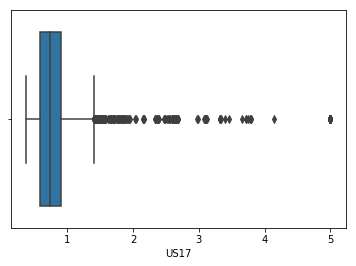

In [25]:
sns.boxplot(x=dataset_train["US17"])

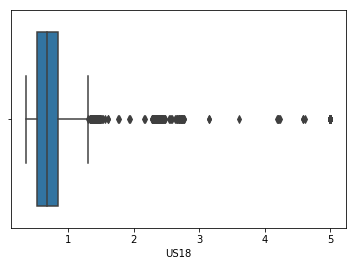

In [26]:
sns.boxplot(x=dataset_train["US18"])

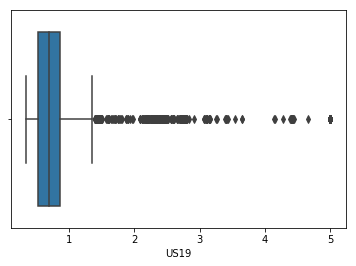

In [27]:
sns.boxplot(x=dataset_train["US19"])

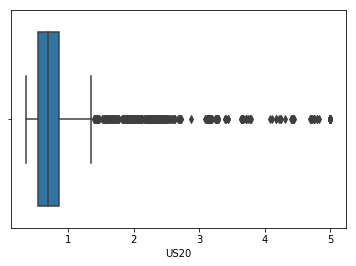

In [28]:
sns.boxplot(x=dataset_train["US20"])

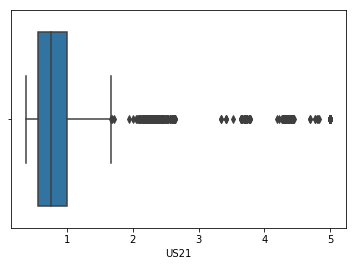

In [29]:
sns.boxplot(x=dataset_train["US21"])

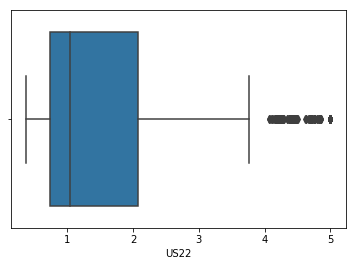

In [30]:
sns.boxplot(x=dataset_train["US22"])

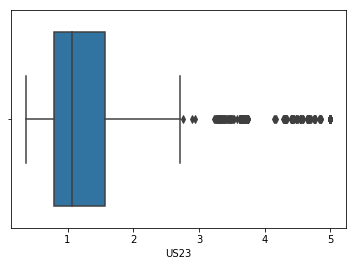

In [31]:
sns.boxplot(x=dataset_train["US23"])

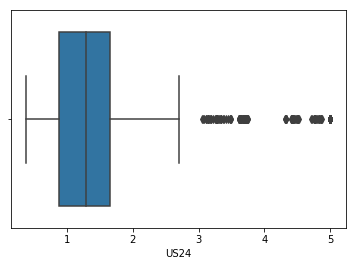

In [32]:
sns.boxplot(x=dataset_train["US24"])

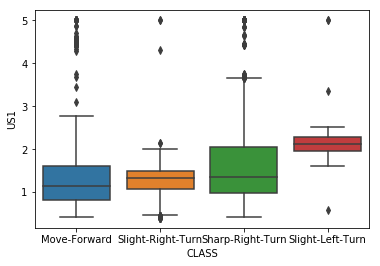

In [33]:
# thise plots were useful in determing the feature dependancy on the output variable.
sns.boxplot(x ='CLASS', y='US1',data = dataset_train)

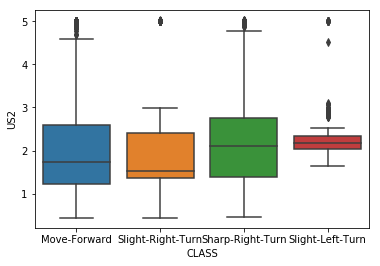

In [34]:
sns.boxplot(x ='CLASS', y='US2',data = dataset_train)

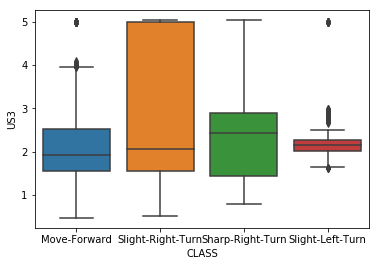

In [35]:
sns.boxplot(x ='CLASS', y='US3',data = dataset_train)

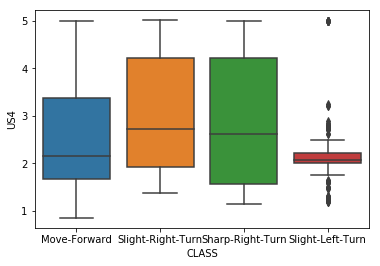

In [36]:
sns.boxplot(x ='CLASS', y='US4',data = dataset_train)

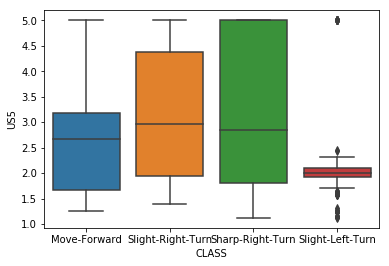

In [37]:
sns.boxplot(x ='CLASS', y='US5',data = dataset_train)

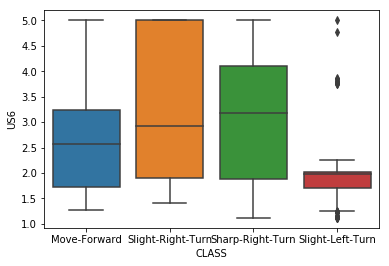

In [38]:
sns.boxplot(x ='CLASS', y='US6',data = dataset_train)

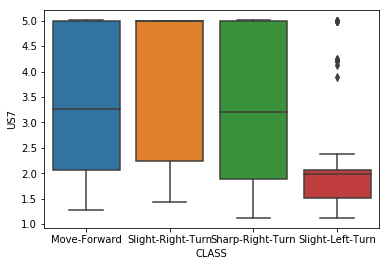

In [39]:
sns.boxplot(x ='CLASS', y='US7',data = dataset_train)

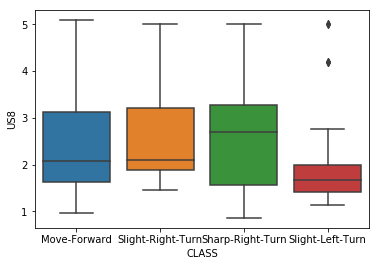

In [40]:
sns.boxplot(x ='CLASS', y='US8',data = dataset_train)

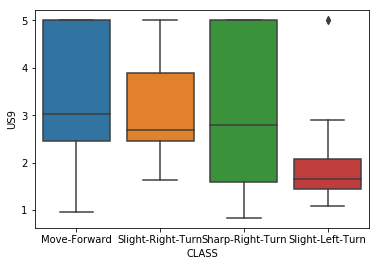

In [41]:
sns.boxplot(x ='CLASS', y='US9',data = dataset_train)

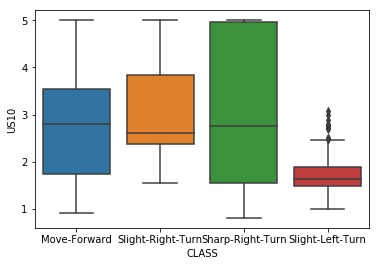

In [42]:
sns.boxplot(x ='CLASS', y='US10',data = dataset_train)

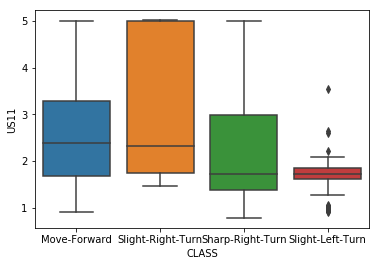

In [43]:
sns.boxplot(x ='CLASS', y='US11',data = dataset_train)

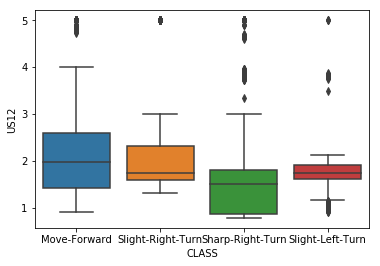

In [44]:
sns.boxplot(x ='CLASS', y='US12',data = dataset_train)

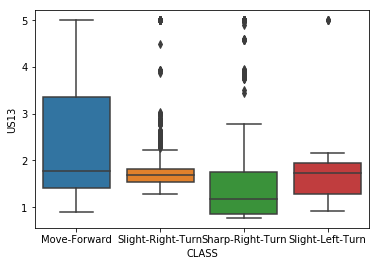

In [45]:
sns.boxplot(x ='CLASS', y='US13',data = dataset_train)

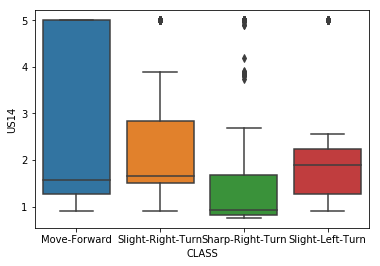

In [46]:
sns.boxplot(x ='CLASS', y='US14',data = dataset_train)

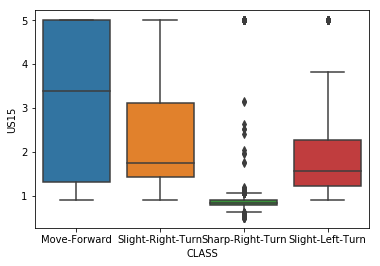

In [47]:
sns.boxplot(x ='CLASS', y='US15',data = dataset_train)

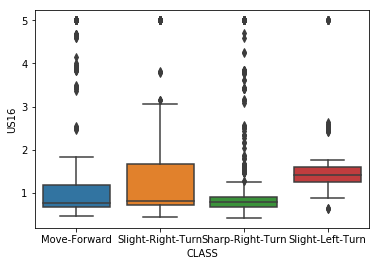

In [48]:
sns.boxplot(x ='CLASS', y='US16',data = dataset_train)

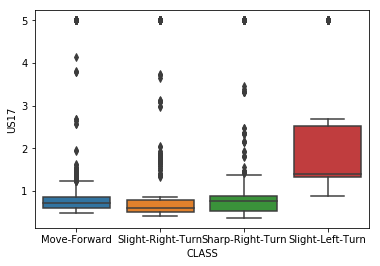

In [49]:
sns.boxplot(x ='CLASS', y='US17',data = dataset_train)

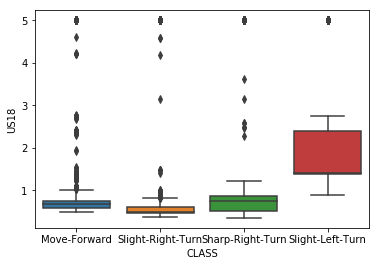

In [50]:
sns.boxplot(x ='CLASS', y='US18',data = dataset_train)

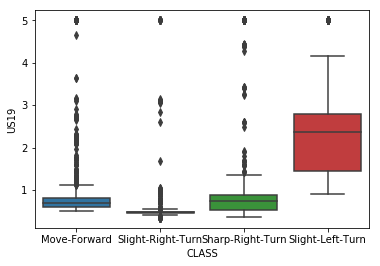

In [51]:
sns.boxplot(x ='CLASS', y='US19',data = dataset_train)

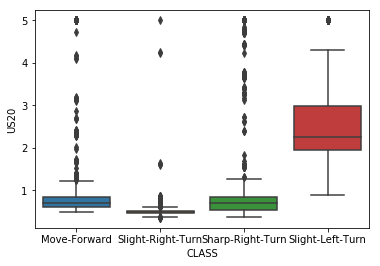

In [52]:
sns.boxplot(x ='CLASS', y='US20',data = dataset_train)

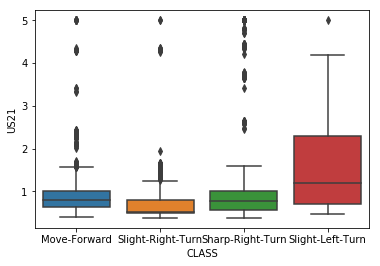

In [53]:
sns.boxplot(x ='CLASS', y='US21',data = dataset_train)

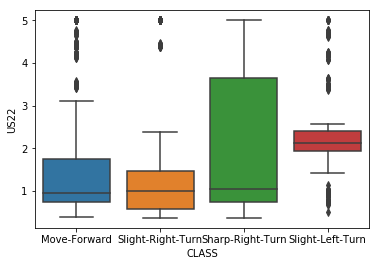

In [54]:
sns.boxplot(x ='CLASS', y='US22',data = dataset_train)

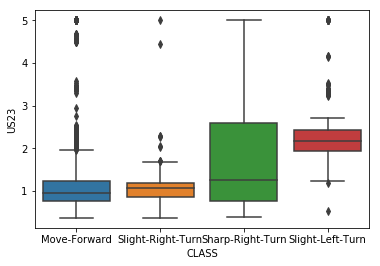

In [55]:
sns.boxplot(x ='CLASS', y='US23',data = dataset_train)

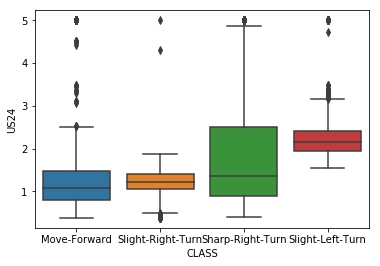

In [56]:
sns.boxplot(x ='CLASS', y='US24',data = dataset_train)

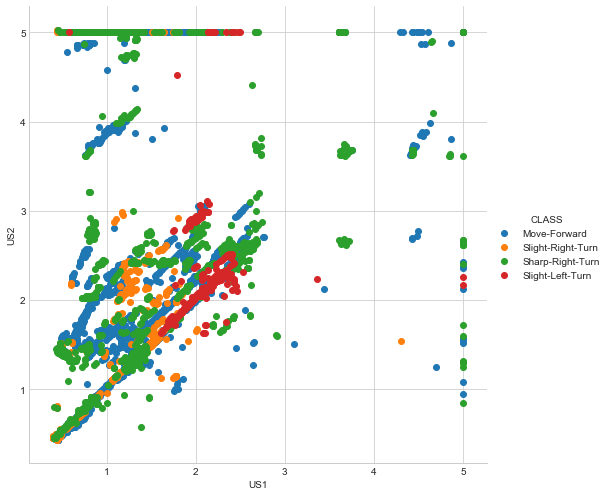

In [57]:
# this scatter plots helps to know about the decision boundry
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US2") \
.add_legend();
plt.show()

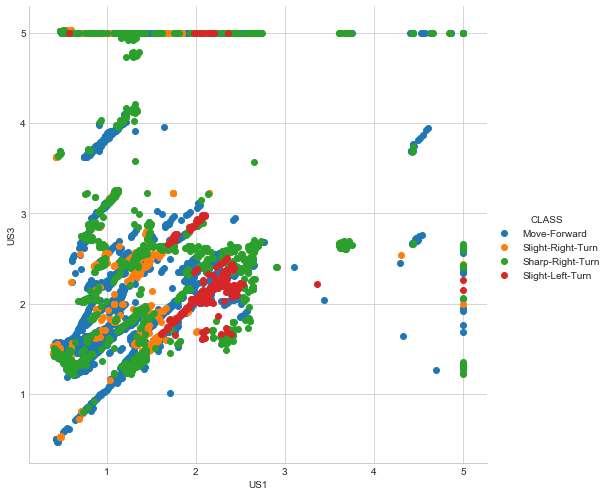

In [58]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US3") \
.add_legend();
plt.show()

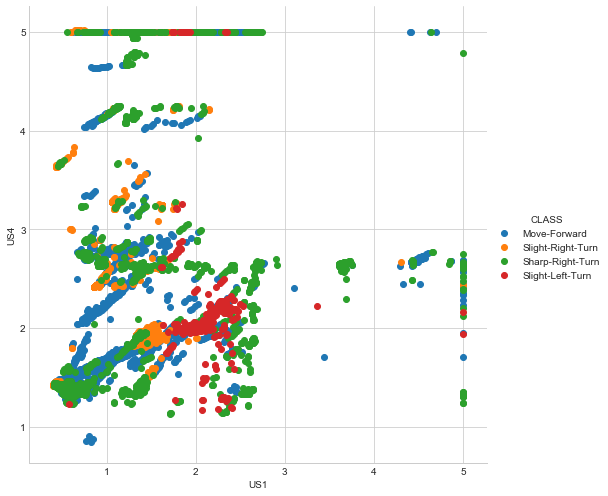

In [59]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US4") \
.add_legend();
plt.show()

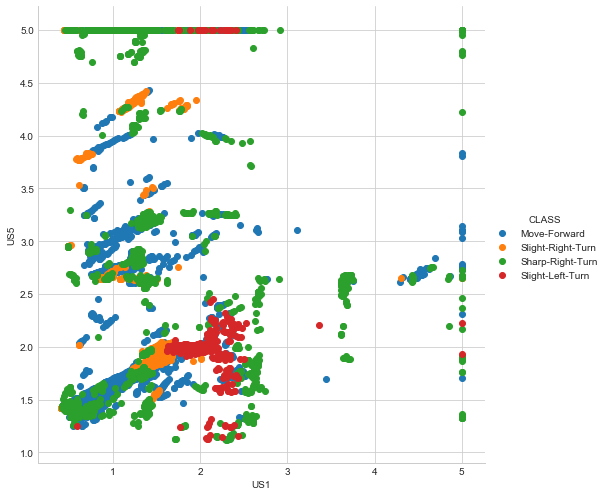

In [60]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US5") \
.add_legend();
plt.show()

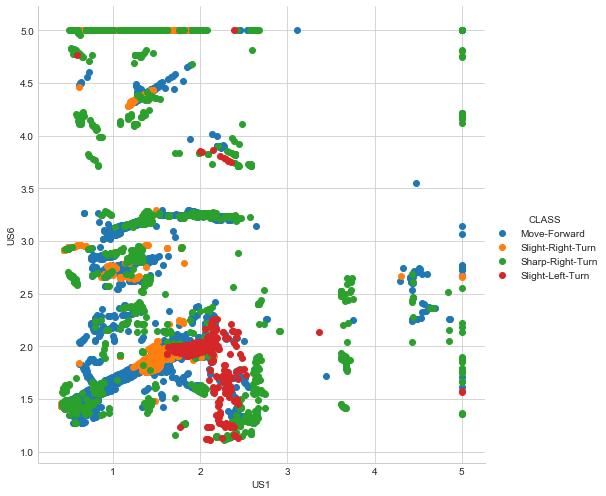

In [61]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US6") \
.add_legend();
plt.show()

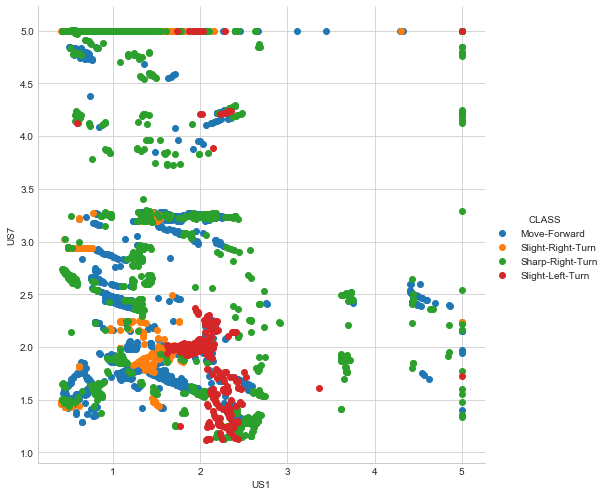

In [62]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US7") \
.add_legend();
plt.show()

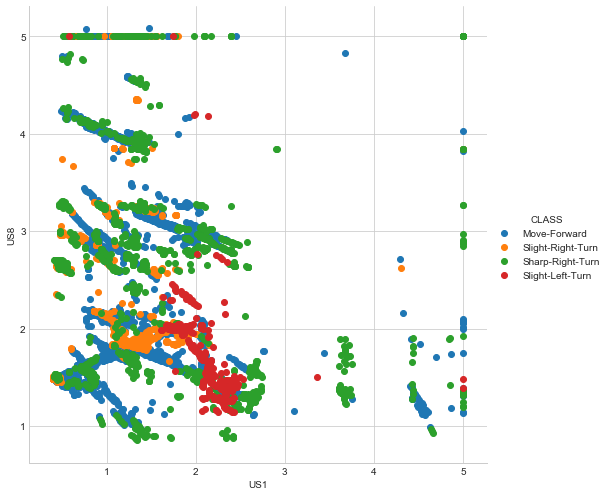

In [63]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US8") \
.add_legend();
plt.show()

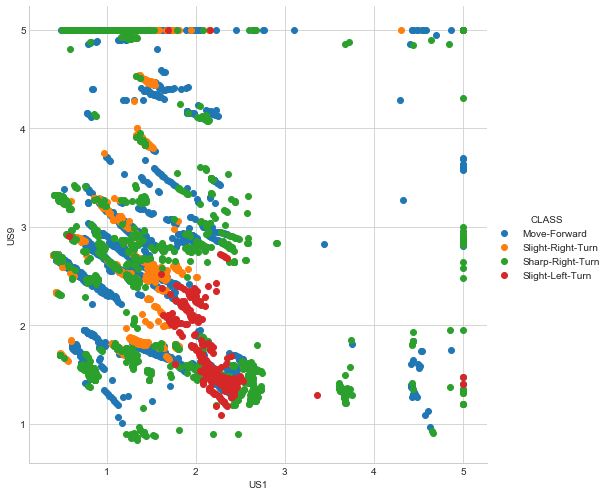

In [64]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US9") \
.add_legend();
plt.show()

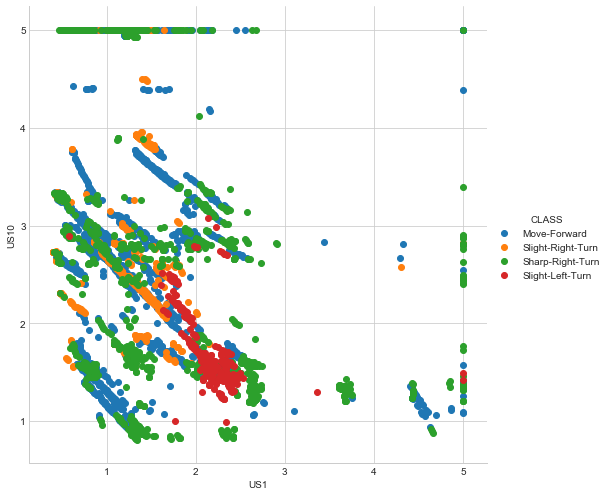

In [65]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US10") \
.add_legend();
plt.show()

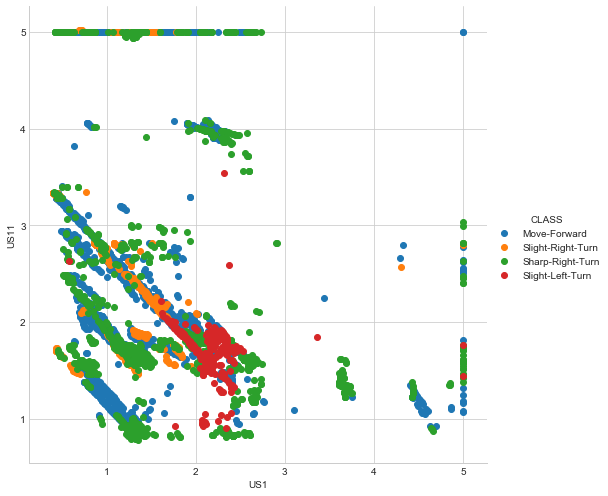

In [66]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US11") \
.add_legend();
plt.show()

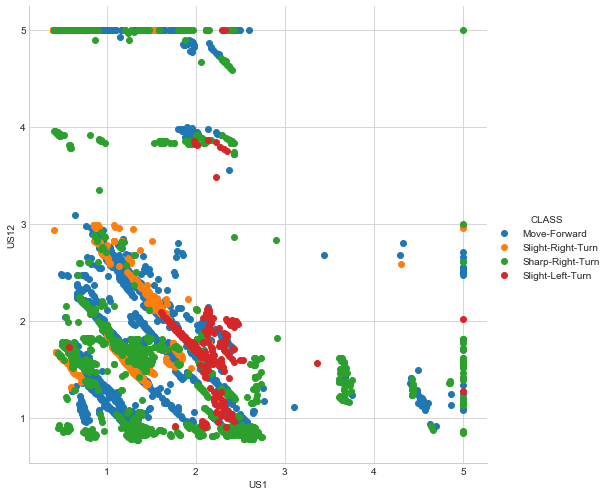

In [67]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US12") \
.add_legend();
plt.show()

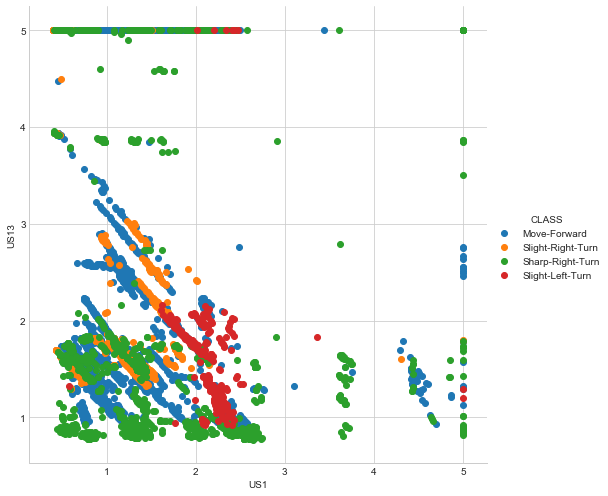

In [68]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US13") \
.add_legend();
plt.show()

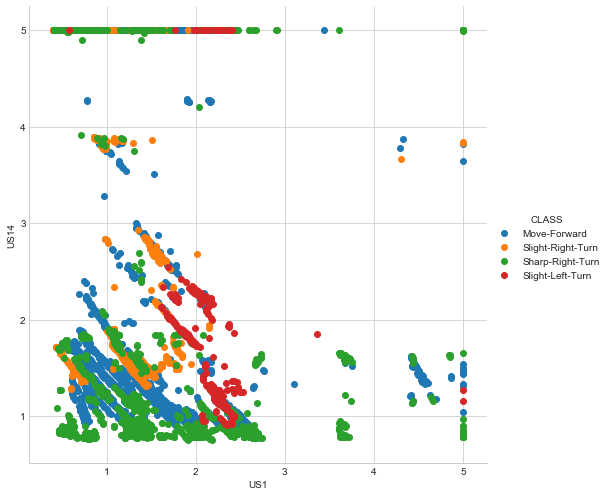

In [69]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US14") \
.add_legend();
plt.show()

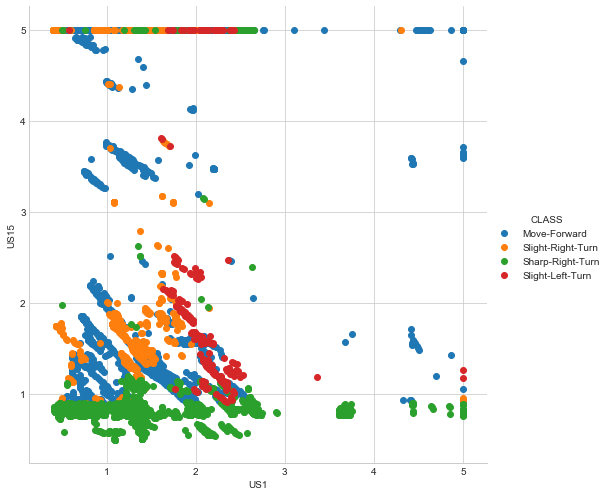

In [70]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US15") \
.add_legend();
plt.show()

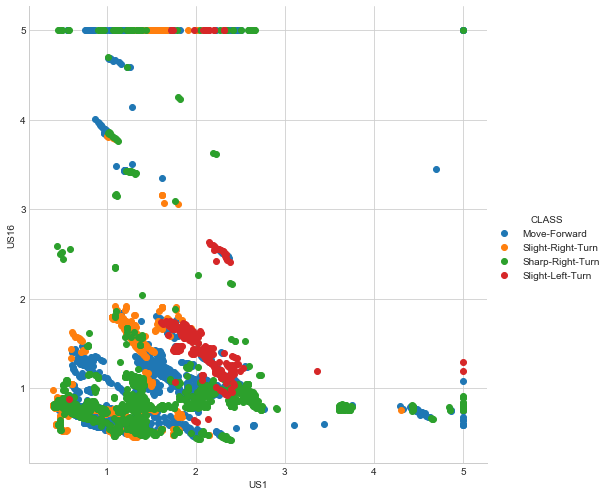

In [71]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US16") \
.add_legend();
plt.show()

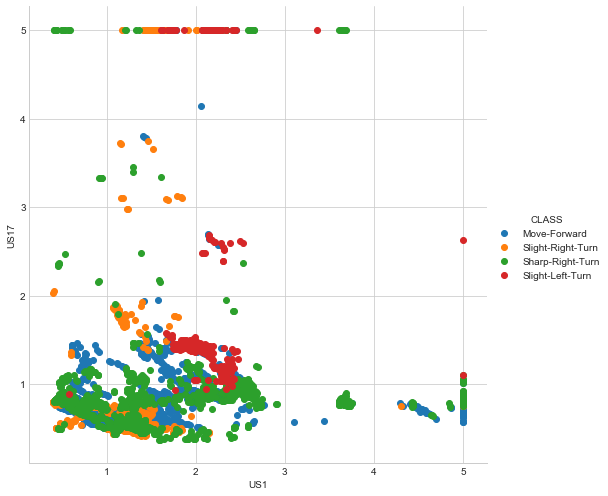

In [72]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US17") \
.add_legend();
plt.show()

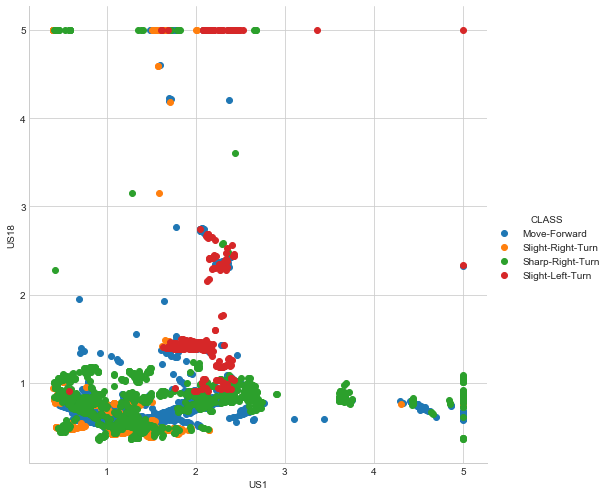

In [73]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US18") \
.add_legend();
plt.show()

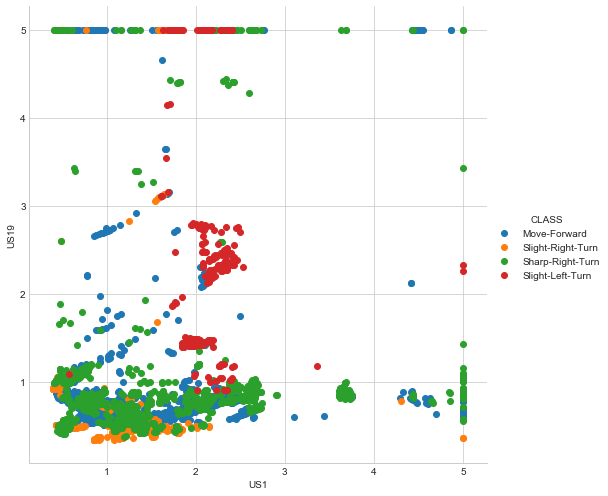

In [74]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US19") \
.add_legend();
plt.show()

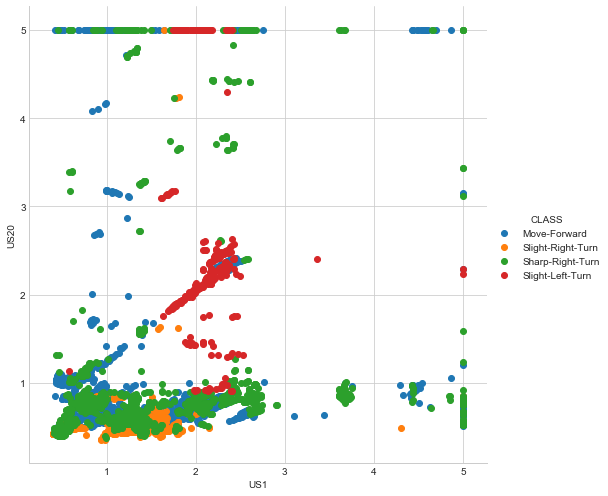

In [75]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US20") \
.add_legend();
plt.show()

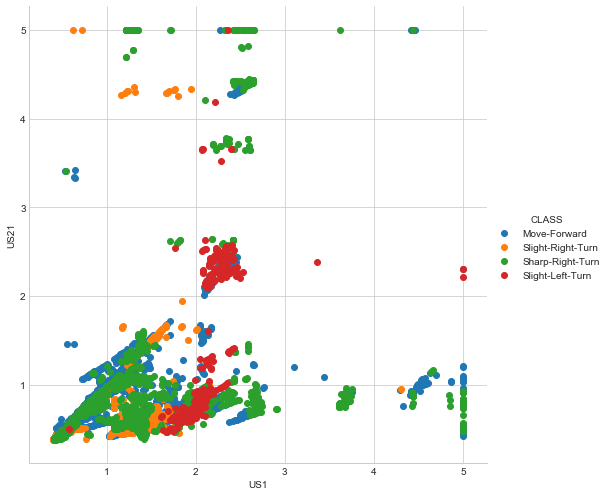

In [76]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US21") \
.add_legend();
plt.show()

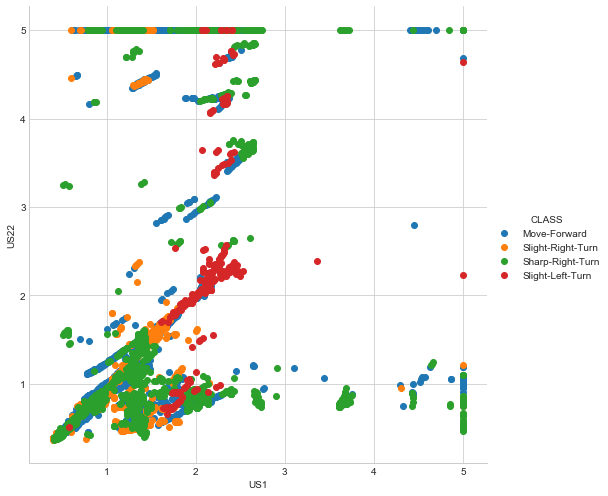

In [77]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US22") \
.add_legend();
plt.show()

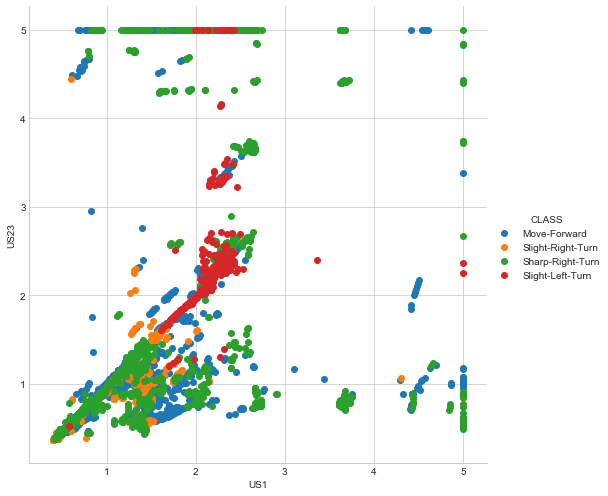

In [78]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US23") \
.add_legend();
plt.show()

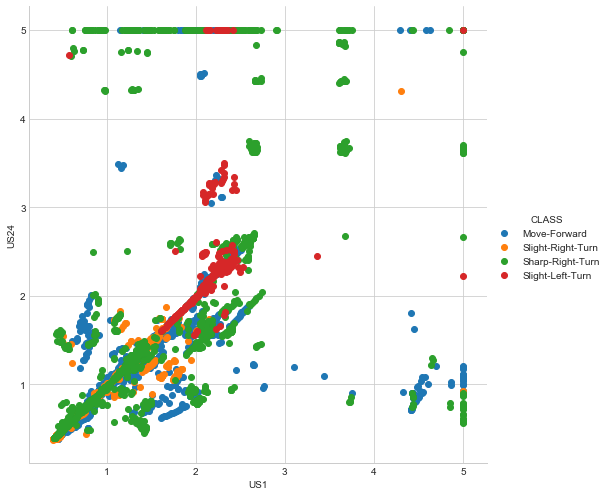

In [79]:
sns.set_style("whitegrid");
sns.FacetGrid(dataset_train, hue = "CLASS", size = 7) \
.map(plt.scatter, "US1","US24") \
.add_legend();
plt.show()

In [80]:
# code to handle outliers
q1_1 = dataset_train['US1'].quantile(0.25)
q3_1 = dataset_train['US1'].quantile(0.75)
iqr_1 = q3_1-q1_1 
lower_limit_1  = q1_1-(1.5*iqr_1)
higher_limit_1 = q3_1+(1.5*iqr_1)
q1_2 = dataset_train['US2'].quantile(0.25)
q3_2 = dataset_train['US2'].quantile(0.75)
iqr_2 = q3_2-q1_2 
lower_limit_2  = q1_2-(1.5*iqr_2)
higher_limit_2 = q3_2+(1.5*iqr_2)
q1_3 = dataset_train['US3'].quantile(0.25)
q3_3 = dataset_train['US3'].quantile(0.75)
iqr_3 = q3_3-q1_3 
lower_limit_3  = q1_3-(1.5*iqr_3)
higher_limit_3 = q3_3+(1.5*iqr_3)
q1_4 = dataset_train['US4'].quantile(0.25)
q3_4 = dataset_train['US4'].quantile(0.75)
iqr_4 = q3_4-q1_4 
lower_limit_4  = q1_4-(1.5*iqr_4)
higher_limit_4 = q3_4+(1.5*iqr_4)
q1_5 = dataset_train['US5'].quantile(0.25)
q3_5 = dataset_train['US5'].quantile(0.75)
iqr_5 = q3_5-q1_5 
lower_limit_5  = q1_5-(1.5*iqr_5)
higher_limit_5 = q3_5+(1.5*iqr_5)
q1_6 = dataset_train['US6'].quantile(0.25)
q3_6 = dataset_train['US6'].quantile(0.75)
iqr_6 = q3_6-q1_6 
lower_limit_6  = q1_6-(1.5*iqr_6)
higher_limit_6 = q3_6+(1.5*iqr_6)
q1_7 = dataset_train['US7'].quantile(0.25)
q3_7 = dataset_train['US7'].quantile(0.75)
iqr_7 = q3_7-q1_7 
lower_limit_7  = q1_7-(1.5*iqr_7)
higher_limit_7 = q3_7+(1.5*iqr_7)
q1_8 = dataset_train['US8'].quantile(0.25)
q3_8 = dataset_train['US8'].quantile(0.75)
iqr_8 = q3_8-q1_8 
lower_limit_8  = q1_8-(1.5*iqr_8)
higher_limit_8 = q3_8+(1.5*iqr_8)
q1_9 = dataset_train['US9'].quantile(0.25)
q3_9 = dataset_train['US9'].quantile(0.75)
iqr_9 = q3_9-q1_9 
lower_limit_9  = q1_9-(1.5*iqr_9)
higher_limit_9 = q3_9+(1.5*iqr_9)
q1_10 = dataset_train['US10'].quantile(0.25)
q3_10 = dataset_train['US10'].quantile(0.75)
iqr_10 = q3_10-q1_10 
lower_limit_10  = q1_10-(1.5*iqr_10)
higher_limit_10 = q3_10+(1.5*iqr_10)
q1_11 = dataset_train['US11'].quantile(0.25)
q3_11 = dataset_train['US11'].quantile(0.75)
iqr_11 = q3_1-q1_11 
lower_limit_11  = q1_11-(1.5*iqr_11)
higher_limit_11 = q3_11+(1.5*iqr_11)
q1_12 = dataset_train['US12'].quantile(0.25)
q3_12 = dataset_train['US12'].quantile(0.75)
iqr_12 = q3_12-q1_12 
lower_limit_12  = q1_12-(1.5*iqr_12)
higher_limit_12 = q3_12+(1.5*iqr_12)
q1_13 = dataset_train['US13'].quantile(0.25)
q3_13 = dataset_train['US13'].quantile(0.75)
iqr_13 = q3_13-q1_13 
lower_limit_13  = q1_13-(1.5*iqr_13)
higher_limit_13 = q3_13+(1.5*iqr_13)
q1_14 = dataset_train['US14'].quantile(0.25)
q3_14 = dataset_train['US14'].quantile(0.75)
iqr_14 = q3_1-q1_14 
lower_limit_14  = q1_14-(1.5*iqr_14)
higher_limit_14 = q3_14+(1.5*iqr_14)
q1_15 = dataset_train['US15'].quantile(0.25)
q3_15 = dataset_train['US15'].quantile(0.75)
iqr_15 = q3_15-q1_15 
lower_limit_15  = q1_15-(1.5*iqr_15)
higher_limit_15 = q3_15+(1.5*iqr_15)
q1_16 = dataset_train['US16'].quantile(0.25)
q3_16 = dataset_train['US16'].quantile(0.75)
iqr_16 = q3_16-q1_16 
lower_limit_16  = q1_16-(1.5*iqr_16)
higher_limit_16 = q3_16+(1.5*iqr_16)
q1_17 = dataset_train['US17'].quantile(0.25)
q3_17 = dataset_train['US17'].quantile(0.75)
iqr_17 = q3_17-q1_17 
lower_limit_17  = q1_17-(1.5*iqr_17)
higher_limit_17 = q3_17+(1.5*iqr_17)
q1_18 = dataset_train['US18'].quantile(0.25)
q3_18 = dataset_train['US18'].quantile(0.75)
iqr_18 = q3_18-q1_18 
lower_limit_18  = q1_18-(1.5*iqr_18)
higher_limit_18 = q3_18+(1.5*iqr_18)
q1_19 = dataset_train['US19'].quantile(0.25)
q3_19 = dataset_train['US19'].quantile(0.75)
iqr_19 = q3_19-q1_19 
lower_limit_19  = q1_19-(1.5*iqr_19)
higher_limit_19 = q3_19+(1.5*iqr_19)
q1_20 = dataset_train['US20'].quantile(0.25)
q3_20 = dataset_train['US20'].quantile(0.75)
iqr_20 = q3_20-q1_20 
lower_limit_20  = q1_20-(1.5*iqr_20)
higher_limit_20 = q3_20+(1.5*iqr_20)
q1_21 = dataset_train['US21'].quantile(0.25)
q3_21 = dataset_train['US21'].quantile(0.75)
iqr_21 = q3_21-q1_21 
lower_limit_21  = q1_21-(1.5*iqr_21)
higher_limit_21 = q3_21+(1.5*iqr_21)
q1_22 = dataset_train['US22'].quantile(0.25)
q3_22 = dataset_train['US22'].quantile(0.75)
iqr_22 = q3_22-q1_22 
lower_limit_22  = q1_22-(1.5*iqr_22)
higher_limit_22 = q3_22+(1.5*iqr_22)
q1_23 = dataset_train['US23'].quantile(0.25)
q3_23 = dataset_train['US23'].quantile(0.75)
iqr_23 = q3_23-q1_23
lower_limit_23  = q1_23-(1.5*iqr_23)
higher_limit_23 = q3_23+(1.5*iqr_23)
q1_24 = dataset_train['US24'].quantile(0.25)
q3_24 = dataset_train['US24'].quantile(0.75)
iqr_24 = q3_24-q1_24 
lower_limit_24  = q1_24-(1.5*iqr_24)
higher_limit_24 = q3_24+(1.5*iqr_24)
dataset_train.US1[dataset_train["US1"] < lower_limit_1] = lower_limit_1
dataset_train.US1[dataset_train["US1"] > higher_limit_1] = higher_limit_1
dataset_train.US2[dataset_train["US2"] < lower_limit_2] = lower_limit_2
dataset_train.US2[dataset_train["US2"] > higher_limit_2] = higher_limit_2
dataset_train.US3[dataset_train["US3"] < lower_limit_3] = lower_limit_3
dataset_train.US3[dataset_train["US3"] > higher_limit_3] = higher_limit_3
dataset_train.US4[dataset_train["US4"] < lower_limit_4] = lower_limit_4
dataset_train.US4[dataset_train["US4"] > higher_limit_4] = higher_limit_4
dataset_train.US5[dataset_train["US5"] < lower_limit_5] = lower_limit_5
dataset_train.US5[dataset_train["US5"] > higher_limit_5] = higher_limit_5
dataset_train.US6[dataset_train["US6"] < lower_limit_6] = lower_limit_6
dataset_train.US6[dataset_train["US6"] > higher_limit_6] = higher_limit_6
dataset_train.US7[dataset_train["US7"] < lower_limit_7] = lower_limit_7
dataset_train.US7[dataset_train["US7"] > higher_limit_7] = higher_limit_7
dataset_train.US8[dataset_train["US8"] < lower_limit_8] = lower_limit_8
dataset_train.US8[dataset_train["US8"] > higher_limit_8] = higher_limit_8
dataset_train.US9[dataset_train["US9"] < lower_limit_9] = lower_limit_9
dataset_train.US9[dataset_train["US9"] > higher_limit_9] = higher_limit_9
dataset_train.US10[dataset_train["US10"] < lower_limit_10] = lower_limit_10
dataset_train.US10[dataset_train["US10"] > higher_limit_10] = higher_limit_10
dataset_train.US11[dataset_train["US11"] < lower_limit_11] = lower_limit_11
dataset_train.US11[dataset_train["US11"] > higher_limit_11] = higher_limit_11
dataset_train.US12[dataset_train["US12"] < lower_limit_12] = lower_limit_12
dataset_train.US12[dataset_train["US12"] > higher_limit_12] = higher_limit_12
dataset_train.US13[dataset_train["US13"] < lower_limit_13] = lower_limit_13
dataset_train.US13[dataset_train["US13"] > higher_limit_13] = higher_limit_13
dataset_train.US14[dataset_train["US14"] < lower_limit_14] = lower_limit_14
dataset_train.US14[dataset_train["US14"] > higher_limit_14] = higher_limit_14
dataset_train.US15[dataset_train["US15"] < lower_limit_15] = lower_limit_15
dataset_train.US15[dataset_train["US15"] > higher_limit_15] = higher_limit_15
dataset_train.US16[dataset_train["US16"] < lower_limit_16] = lower_limit_16
dataset_train.US16[dataset_train["US16"] > higher_limit_16] = higher_limit_16
dataset_train.US17[dataset_train["US17"] < lower_limit_17] = lower_limit_17
dataset_train.US17[dataset_train["US17"] > higher_limit_17] = higher_limit_17
dataset_train.US18[dataset_train["US18"] < lower_limit_18] = lower_limit_18
dataset_train.US18[dataset_train["US18"] > higher_limit_18] = higher_limit_18
dataset_train.US19[dataset_train["US19"] < lower_limit_19] = lower_limit_19
dataset_train.US19[dataset_train["US19"] > higher_limit_19] = higher_limit_19
dataset_train.US20[dataset_train["US20"] < lower_limit_20] = lower_limit_20
dataset_train.US20[dataset_train["US20"] > higher_limit_20] = higher_limit_20
dataset_train.US21[dataset_train["US21"] < lower_limit_21] = lower_limit_21
dataset_train.US21[dataset_train["US21"] > higher_limit_21] = higher_limit_21
dataset_train.US22[dataset_train["US22"] < lower_limit_22] = lower_limit_22
dataset_train.US22[dataset_train["US22"] > higher_limit_22] = higher_limit_22
dataset_train.US23[dataset_train["US23"] < lower_limit_23] = lower_limit_23
dataset_train.US23[dataset_train["US23"] > higher_limit_23] = higher_limit_23
dataset_train.US24[dataset_train["US24"] < lower_limit_24] = lower_limit_24
dataset_train.US24[dataset_train["US24"] > higher_limit_24] = higher_limit_24

C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:122: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:123: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:124: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:151: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:152: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:153: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\prane\Anaconda3\lib\site-packages\ipykernel_launcher.py:154: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from

In [81]:
dataset_train.describe()

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US15,US16,US17,US18,US19,US20,US21,US22,US23,US24
count,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,...,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000,4636.000000
mean,1.423795,2.264274,2.429034,2.798682,2.962284,2.900792,3.364229,2.546533,3.129461,2.837426,...,2.191850,0.974375,0.803797,0.737047,0.757988,0.765202,0.855899,1.633858,1.313301,1.393612
std,0.646176,1.287533,1.116965,1.309920,1.339737,1.283546,1.415131,1.111684,1.356676,1.306787,...,1.709719,0.412067,0.291284,0.255809,0.291532,0.285223,0.364285,1.288085,0.719116,0.675145
min,0.400000,0.437000,0.470000,0.848000,1.120000,1.114000,1.122000,0.859000,0.836000,0.810000,...,0.495000,0.424000,0.373000,0.354000,0.340000,0.355000,0.380000,0.370000,0.367000,0.377000
25%,0.922000,1.363000,1.540000,1.731750,1.772000,1.789000,1.932750,1.626000,1.803000,1.645000,...,0.860000,0.691000,0.580000,0.528750,0.522750,0.540000,0.565750,0.742750,0.793750,0.883750
50%,1.332000,1.905000,2.067500,2.456500,2.666500,2.692000,3.229000,2.177500,2.802000,2.679500,...,1.318500,0.805000,0.738000,0.683000,0.687000,0.691000,0.764500,1.035000,1.073000,1.287000
75%,1.800000,2.670250,2.749000,4.103750,4.318500,3.899000,5.000000,3.195250,5.000000,3.546750,...,4.363500,1.165250,0.913000,0.840000,0.858000,0.862000,1.009000,2.069250,1.568250,1.657000
max,3.117000,4.631125,4.562500,5.017000,5.000000,5.005000,5.008000,5.087000,5.000000,5.000000,...,5.000000,1.876625,1.412500,1.306875,1.360875,1.345000,1.673875,4.059000,2.730000,2.816875


In [82]:
X_tr = dataset_train.iloc[:, :-1].values
Y_tr = dataset_train.iloc[:, 24].values

In [83]:
# feature scaling
from sklearn.preprocessing import StandardScaler
SS = StandardScaler()
X_tr = SS.fit_transform(X_tr)
X_test = SS.transform(X_test)

In [84]:
new_dataset_train = pd.DataFrame(X_tr)
new_dataset_train.columns = ['US1','US2','US3','US4','US5','US6','US7','US8','US9','US10','US11','US12','US13','US14','US15',
                         'US16','US17','US18','US19','US20','US21','US22','US23','US24']
new_dataset_train['CLASS'] = Y_tr

In [85]:
new_dataset_train.describe()

,US1,US2,US3,US4,US5,US6,US7,US8,US9,US10,...,US15,US16,US17,US18,US19,US20,US21,US22,US23,US24
count,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,...,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03,4.636000e+03
mean,-1.004302e-14,1.081847e-14,-5.792701e-15,1.011151e-15,-3.695826e-15,4.875402e-15,-6.765751e-16,-1.788953e-15,-5.069619e-15,1.592150e-15,...,-6.851963e-16,9.976291e-15,1.621651e-14,-3.956863e-14,1.452436e-14,4.218292e-14,1.147352e-14,-2.189228e-14,2.605882e-14,-2.633207e-14
std,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,...,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00,1.000108e+00
min,-1.584562e+00,-1.419359e+00,-1.754080e+00,-1.489322e+00,-1.375257e+00,-1.392225e+00,-1.584638e+00,-1.518161e+00,-1.690683e+00,-1.551627e+00,...,-9.925797e-01,-1.335788e+00,-1.479118e+00,-1.497553e+00,-1.433917e+00,-1.438333e+00,-1.306532e+00,-9.812975e-01,-1.316065e+00,-1.505930e+00
25%,-7.766452e-01,-7.000764e-01,-7.960235e-01,-8.145895e-01,-8.885419e-01,-8.662812e-01,-1.011661e+00,-8.281424e-01,-9.778342e-01,-9.125856e-01,...,-7.790713e-01,-6.877651e-01,-7.683951e-01,-8.143534e-01,-8.069893e-01,-7.896484e-01,-7.965741e-01,-6.918831e-01,-7.225642e-01,-7.552699e-01
50%,-1.420744e-01,-2.790708e-01,-3.237106e-01,-2.612517e-01,-2.208015e-01,-1.626855e-01,-9.556939e-02,-3.319947e-01,-2.413962e-01,-1.208637e-01,...,-5.108697e-01,-4.110811e-01,-2.259111e-01,-2.113002e-01,-2.435264e-01,-2.601817e-01,-2.509261e-01,-4.649714e-01,-3.341982e-01,-1.579267e-01
75%,5.822651e-01,3.153471e-01,2.864908e-01,9.964036e-01,1.012409e+00,7.777795e-01,1.156040e+00,5.836069e-01,1.378915e+00,5.428587e-01,...,1.270316e+00,4.632646e-01,3.749415e-01,4.025042e-01,3.430925e-01,3.394131e-01,4.203239e-01,3.380517e-01,3.545690e-01,3.901626e-01
max,2.620631e+00,1.838482e+00,1.910262e+00,1.693659e+00,1.521146e+00,1.639548e+00,1.161693e+00,2.285488e+00,1.378915e+00,1.655058e+00,...,1.642640e+00,2.189809e+00,2.089946e+00,2.227791e+00,2.068215e+00,2.033005e+00,2.245671e+00,1.882954e+00,1.970269e+00,2.108311e+00


In [86]:
# decision tree model
from sklearn.tree import DecisionTreeClassifier
classifier_1 = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Y_pred_1 = classifier_1.fit(X_tr,Y_tr).predict(X_tr)
Y_pred_test_1 = classifier_1.fit(X_tr,Y_tr).predict(X_test)

In [87]:
from sklearn.model_selection import cross_val_score
scores_DTC = cross_val_score(classifier_1, X_tr, Y_tr, cv=10)
sum_DTC = 0
for i in range(10):
    sum_DTC = sum_DTC + scores_DTC[i]
score_DTC = sum_DTC/10
score_DTC

0.99632873715456982

In [88]:
from sklearn.metrics import classification_report
print(classification_report(Y_tr, Y_pred_1, digits=3))

                   precision    recall  f1-score   support

     Move-Forward      1.000     1.000     1.000      1863
 Sharp-Right-Turn      1.000     1.000     1.000      1778
 Slight-Left-Turn      1.000     1.000     1.000       282
Slight-Right-Turn      1.000     1.000     1.000       713

      avg / total      1.000     1.000     1.000      4636



In [89]:
confusion_matrix(Y_tr, Y_pred_1)

array([[1863,    0,    0,    0],
       [   0, 1778,    0,    0],
       [   0,    0,  282,    0],
       [   0,    0,    0,  713]], dtype=int64)

In [90]:
accuracy_score(Y_tr, Y_pred_1)

1.0

In [91]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test_1, digits=3))

                   precision    recall  f1-score   support

     Move-Forward      0.997     0.997     0.997       342
 Sharp-Right-Turn      1.000     1.000     1.000       319
 Slight-Left-Turn      1.000     0.978     0.989        46
Slight-Right-Turn      0.991     1.000     0.996       112

      avg / total      0.998     0.998     0.998       819



In [92]:
confusion_matrix(Y_test, Y_pred_test_1)

array([[341,   0,   0,   1],
       [  0, 319,   0,   0],
       [  1,   0,  45,   0],
       [  0,   0,   0, 112]], dtype=int64)

In [93]:
accuracy_score(Y_test, Y_pred_test_1)

0.99755799755799757

In [94]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 1, criterion = 'entropy', random_state = 0)
Y_pred_2 = classifier.fit(X_tr,Y_tr).predict(X_tr)
Y_pred_test_2 = classifier.fit(X_tr,Y_tr).predict(X_test)

In [95]:
from sklearn.model_selection import cross_val_score
scores_RFC = cross_val_score(classifier, X_tr, Y_tr, cv=10)
sum_RFC = 0
for i in range(10):
    sum_RFC = sum_RFC + scores_RFC[i]
score_RFC = sum_RFC/10
score_RFC

0.95425359695384748

In [96]:
from sklearn.metrics import classification_report
print(classification_report(Y_tr, Y_pred_2, digits=3))

                   precision    recall  f1-score   support

     Move-Forward      0.977     0.978     0.977      1863
 Sharp-Right-Turn      0.988     0.989     0.988      1778
 Slight-Left-Turn      0.947     0.947     0.947       282
Slight-Right-Turn      0.975     0.971     0.973       713

      avg / total      0.979     0.979     0.979      4636



In [97]:
confusion_matrix(Y_tr, Y_pred_2)

array([[1822,   17,   13,   11],
       [  15, 1758,    1,    4],
       [  10,    2,  267,    3],
       [  18,    2,    1,  692]], dtype=int64)

In [98]:
accuracy_score(Y_tr, Y_pred_2)

0.97907679033649697

In [99]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test_2, digits=3))

                   precision    recall  f1-score   support

     Move-Forward      0.931     0.950     0.941       342
 Sharp-Right-Turn      0.990     0.969     0.979       319
 Slight-Left-Turn      0.902     0.804     0.851        46
Slight-Right-Turn      0.906     0.946     0.926       112

      avg / total      0.949     0.949     0.949       819



In [100]:
confusion_matrix(Y_test, Y_pred_test_2)

array([[325,   3,   3,  11],
       [  9, 309,   1,   0],
       [  9,   0,  37,   0],
       [  6,   0,   0, 106]], dtype=int64)

In [101]:
accuracy_score(Y_test, Y_pred_test_2)

0.94871794871794868

In [102]:
# support vector classifier model
from sklearn import svm
svc = svm.SVC(kernel='poly')
Y_pred_3 = svc.fit(X_tr, Y_tr).predict(X_tr)
Y_pred_test_3 = svc.fit(X_tr, Y_tr).predict(X_test)

In [103]:
scores_SVC = cross_val_score(svc, X_tr, Y_tr, cv=10)
sum_SVC = 0
for i in range(10):
    sum_SVC = sum_SVC + scores_SVC[i]
score_SVC = sum_SVC/10
score_SVC

0.89623207341360822

In [104]:
from sklearn.metrics import classification_report
print(classification_report(Y_tr, Y_pred_3, digits=3))

                   precision    recall  f1-score   support

     Move-Forward      0.921     0.944     0.932      1863
 Sharp-Right-Turn      0.945     0.932     0.938      1778
 Slight-Left-Turn      0.996     0.950     0.973       282
Slight-Right-Turn      0.916     0.906     0.911       713

      avg / total      0.934     0.934     0.934      4636



In [105]:
confusion_matrix(Y_tr, Y_pred_3)

array([[1758,   75,    0,   30],
       [  91, 1657,    1,   29],
       [   5,    9,  268,    0],
       [  54,   13,    0,  646]], dtype=int64)

In [106]:
accuracy_score(Y_tr, Y_pred_3)

0.93377911993097495

In [107]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_test_3, digits=3))

                   precision    recall  f1-score   support

     Move-Forward      0.829     0.836     0.833       342
 Sharp-Right-Turn      0.925     0.699     0.796       319
 Slight-Left-Turn      0.459     0.978     0.625        46
Slight-Right-Turn      0.748     0.902     0.818       112

      avg / total      0.835     0.800     0.805       819



In [108]:
confusion_matrix(Y_test, Y_pred_test_3)

array([[286,  17,  25,  14],
       [ 49, 223,  27,  20],
       [  1,   0,  45,   0],
       [  9,   1,   1, 101]], dtype=int64)

In [109]:
accuracy_score(Y_test, Y_pred_test_3)

0.7997557997557998

In [110]:
# code for feature elimination
X_tr1 = np.empty([4636,22])
for i in range (4636):
    X_tr1[i,0] = X_tr[i,0]
    X_tr1[i,1] = X_tr[i,1]
    X_tr1[i,2] = X_tr[i,2]
    X_tr1[i,3] = X_tr[i,3]
    X_tr1[i,4] = X_tr[i,4]
    X_tr1[i,5] = X_tr[i,5]
    X_tr1[i,6] = X_tr[i,6]
    X_tr1[i,7] = X_tr[i,7]
    X_tr1[i,8] = X_tr[i,8]
    X_tr1[i,9] = X_tr[i,9]
    X_tr1[i,10] = X_tr[i,10]
    X_tr1[i,11] = X_tr[i,11]
    X_tr1[i,12] = X_tr[i,12]
    X_tr1[i,13] = X_tr[i,13]
    X_tr1[i,14] = X_tr[i,14]
    X_tr1[i,15] = X_tr[i,15]
    X_tr1[i,16] = X_tr[i,18]
    X_tr1[i,17] = X_tr[i,19]
    X_tr1[i,18] = X_tr[i,20]
    X_tr1[i,19] = X_tr[i,21]
    X_tr1[i,20] = X_tr[i,22]
    X_tr1[i,21] = X_tr[i,23]
X_test1 = np.empty([819,22])
for j in range(819):
    X_test1[j,0] = X_test[j,0]
    X_test1[j,1] = X_test[j,1]
    X_test1[j,2] = X_test[j,2]
    X_test1[j,3] = X_test[j,3]
    X_test1[j,4] = X_test[j,4]
    X_test1[j,5] = X_test[j,5]
    X_test1[j,6] = X_test[j,6]
    X_test1[j,7] = X_test[j,7]
    X_test1[j,8] = X_test[j,8]
    X_test1[j,9] = X_test[j,9]
    X_test1[j,10] = X_test[j,10]
    X_test1[j,11] = X_test[j,11]
    X_test1[j,12] = X_test[j,12]
    X_test1[j,13] = X_test[j,13]
    X_test1[j,14] = X_test[j,14]
    X_test1[j,15] = X_test[j,15]
    X_test1[j,16] = X_test[j,18]
    X_test1[j,17] = X_test[j,19]
    X_test1[j,18] = X_test[j,20]
    X_test1[j,19] = X_test[j,21]
    X_test1[j,20] = X_test[j,22]
    X_test1[j,21] = X_test[j,23]

In [111]:
# fine tuning of random forrest classifier
from sklearn.model_selection import GridSearchCV
param_grid = [
 {'n_estimators': [3, 10, 30], 'max_features': [2, 4, 6, 8]},
 {'bootstrap': [False], 'n_estimators': [3, 10], 'max_features': [2, 3, 4]},
 ]
forest_reg = RandomForestClassifier()
grid_search_rfc = GridSearchCV(forest_reg, param_grid, cv=5)
grid_search_rfc.fit(X_tr1, Y_tr)
fc = grid_search_rfc.best_estimator_
Y_pred_best_1 = fc.predict(X_test1)

In [112]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_best_1, digits=3))

                   precision    recall  f1-score   support

     Move-Forward      0.994     1.000     0.997       342
 Sharp-Right-Turn      1.000     1.000     1.000       319
 Slight-Left-Turn      1.000     0.978     0.989        46
Slight-Right-Turn      1.000     0.991     0.996       112

      avg / total      0.998     0.998     0.998       819



In [113]:
confusion_matrix(Y_test, Y_pred_best_1)

array([[342,   0,   0,   0],
       [  0, 319,   0,   0],
       [  1,   0,  45,   0],
       [  1,   0,   0, 111]], dtype=int64)

In [114]:
accuracy_score(Y_test, Y_pred_best_1)

0.99755799755799757

In [115]:
# fine tuning of svc model
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'gamma' : [0.001, 0.01, 0.1, 1, 10]}
svcb = svm.SVC(kernel='poly')
grid_search_svm = GridSearchCV(svcb, param_grid, cv=5)
grid_search_svm.fit(X_tr1, Y_tr)
svmb = grid_search_svm.best_estimator_
Y_pred_best_2 = svmb.predict(X_test1)

In [116]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_best_2, digits=3))

                   precision    recall  f1-score   support

     Move-Forward      0.810     0.845     0.827       342
 Sharp-Right-Turn      0.931     0.674     0.782       319
 Slight-Left-Turn      0.524     0.935     0.672        46
Slight-Right-Turn      0.725     0.964     0.828       112

      avg / total      0.829     0.800     0.801       819



In [117]:
confusion_matrix(Y_test, Y_pred_best_2)

array([[289,  15,  15,  23],
       [ 62, 215,  24,  18],
       [  2,   1,  43,   0],
       [  4,   0,   0, 108]], dtype=int64)

In [118]:
accuracy_score(Y_test, Y_pred_best_2)

0.7997557997557998

In [119]:
# fine tuning of decision tree clasifier model
from sklearn.model_selection import GridSearchCV
parameters={'min_samples_split' : range(10,500,20),'max_depth': range(1,20,2)}
dtc = DecisionTreeClassifier()
grid_search_dtc = GridSearchCV(dtc,parameters, cv = 5)
grid_search_dtc.fit(X_tr1,Y_tr)
dtcb = grid_search_dtc.best_estimator_
Y_pred_best_3 = dtcb.predict(X_test1)

In [120]:
from sklearn.metrics import classification_report
print(classification_report(Y_test, Y_pred_best_3, digits=3))

                   precision    recall  f1-score   support

     Move-Forward      0.986     1.000     0.993       342
 Sharp-Right-Turn      1.000     0.997     0.998       319
 Slight-Left-Turn      1.000     0.978     0.989        46
Slight-Right-Turn      1.000     0.973     0.986       112

      avg / total      0.994     0.994     0.994       819



In [121]:
confusion_matrix(Y_test, Y_pred_best_3)

array([[342,   0,   0,   0],
       [  1, 318,   0,   0],
       [  1,   0,  45,   0],
       [  3,   0,   0, 109]], dtype=int64)

In [122]:
accuracy_score(Y_test, Y_pred_best_3)

0.99389499389499392